In [1]:
import numpy as np
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
### getting necessary auth to access sheet
scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
#Name of our Service Account Key
google_key_file = 'service_key.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '11yF4VFlMYCyfHdulolGM9P_yIwRX9icS-Zv27uayVKY'
sheet_name = 'data_export_exp3'
#Opening the worksheet by using Worksheet ID
workbook = gc.open_by_key(spreadsheet_key)
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(sheet_name)
values = sheet.get_all_values()
#Pulling the data and transform it to the data frame
df = pd.DataFrame(values[1:], columns = values[0])
# df[['v_b', 'i_b','v_g','i_g','v_y','i_y']] = df[['v_b', 'i_b','v_g','i_g','v_y','i_y']].astype(float)
# df.dtypes
for column in df.columns:
    df[column]= df[column].astype('float64') 

In [3]:
# used to generate voltage distribution between i = 0 and i = max
# dist = np.linspace(-0.325,-0.112,20)
# for x in dist: print(round(x,3))

<Figure size 432x288 with 0 Axes>

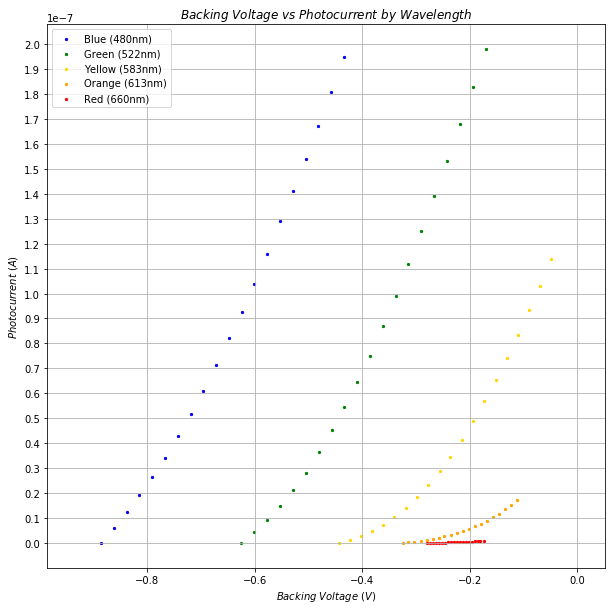

In [8]:
#initial plot of data
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=20)
# plt.scatter(df.v_b, df.i_predicted_b,color='black', label="Blue (480nm)", marker='x', s=20)
plt.scatter(df.v_g,df.i_g, color='green',label="Green (522nm)",marker='.', s=20)
plt.scatter(df.v_y,df.i_y,color='gold',label="Yellow (583nm)",marker='.', s=20)
plt.scatter(df.v_o,df.i_o,color='orange',label="Orange (613nm)",marker='.', s=20)
plt.scatter(df.v_r,df.i_r,color='red',label="Red (660nm)",marker='.', s=20)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
# plt.show()
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(min(df.v_b)-0.1,max(df.v_y)+0.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

In [31]:
# linear fit
from scipy.stats import linregress
# blue linear fit (x, y)
regress_b = linregress(df.v_b,df.i_b)
regress_fn_b = lambda x: regress_b.slope*x + regress_b.intercept
# green
regress_g = linregress(df.v_g,df.i_g)
regress_fn_g = lambda x: regress_g.slope*x + regress_g.intercept
# yellow
regress_y = linregress(df.v_y,df.i_y)
regress_fn_y = lambda x: regress_y.slope*x + regress_y.intercept
# orange
regress_o = linregress(df.v_o,df.i_o)
regress_fn_o = lambda x: regress_o.slope*x + regress_o.intercept
# red
regress_r = linregress(df.v_r,df.i_r)
regress_fn_r = lambda x: regress_r.slope*x + regress_r.intercept

<Figure size 432x288 with 0 Axes>

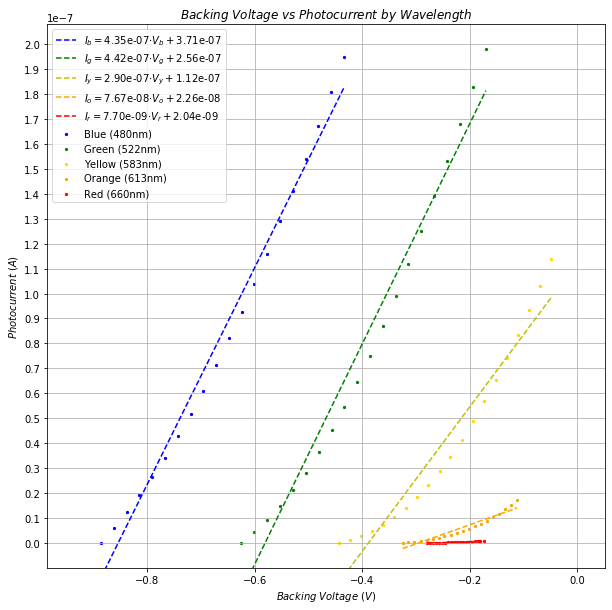

In [38]:
plt.clf()
plt.figure(figsize=(10,10))
#blue
plt.scatter(df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=20)
label_blue = r"$I_{b} = $"+"{:.2e}".format(regress_b.slope) + "$\cdot V_b + $" +"{:.2e}".format(regress_b.intercept)
plt.plot(df.v_b, regress_fn_b(df.v_b), 'b--', label=label_blue)

#green
plt.scatter(df.v_g,df.i_g, color='green',label="Green (522nm)",marker='.', s=20)
label_green = r"$I_{g} = $"+"{:.2e}".format(regress_g.slope) + "$\cdot V_g + $" +"{:.2e}".format(regress_g.intercept)
plt.plot(df.v_g, regress_fn_g(df.v_g), 'g--', label=label_green)

#yellow
plt.scatter(df.v_y,df.i_y,color='gold',label="Yellow (583nm)",marker='.', s=20)
label_yellow = r"$I_{y} = $"+"{:.2e}".format(regress_y.slope) + "$\cdot V_y + $" +"{:.2e}".format(regress_y.intercept)
plt.plot(df.v_y, regress_fn_y(df.v_y), 'y--', label=label_yellow)

#orange
plt.scatter(df.v_o,df.i_o,color='orange',label="Orange (613nm)",marker='.', s=20)
label_orange = r"$I_{o} = $"+"{:.2e}".format(regress_o.slope) + "$\cdot V_o + $" +"{:.2e}".format(regress_o.intercept)
plt.plot(df.v_o, regress_fn_o(df.v_o), '--',color='orange', label=label_orange)

#red
plt.scatter(df.v_r,df.i_r,color='red',label="Red (660nm)",marker='.', s=20)
label_red = r"$I_{r} = $"+"{:.2e}".format(regress_r.slope) + "$\cdot V_r + $" +"{:.2e}".format(regress_r.intercept)
plt.plot(df.v_r, regress_fn_r(df.v_r), 'r--', label=label_red)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(min(df.v_b)-0.1,max(df.v_y)+0.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

## Predicting a Photocurrent

Predicting the photocurrent for some given backing voltage and wavelength of light is undoubtedly a complex problem. Such a prediction would depend on the type of material of our collector and our emitter, the geometry of the system and some understanding of how the electrons are distributed inside out emitter.

Although getting a substantially accurate prediction is out of the scope of this experiment, we can begin to approximate a solution by considering a couple of improvements over a simple linear relationship between voltage and photocurrent. 

### Approach

The way we will approach an approximation is as follows. We know that for every electron inside our emitter, there exists a relationship such that:

$$ K_{max} = hv - \phi $$

As the electron moves from the emitter to the collector, we know that the electric field does negative work on the electron. We can use this to denote the change in potential energy of the system:

$$ U_{collector}-U_{emitter} = -W_{emitter \rightarrow collector} $$

Since the work being done will be negative, there has been a positive increase in potential energy. If the potential energy of the system has increased, by the conservation of energy we know the kinetic energy of the system has decreased by that same magnitude. Thus at the point where electrons no longer reach the collector, we know the theoretical potential energy that the electron would have had at the collector is larger than the kinetic energy after ejection. This helps us establish the equality:

$$eV = hv-\phi$$

##### Work Function
Another component needed to establish a photocurrent prediction is the work function. The work function is defined as the energy required to remove an electron from a solid to a vacuum right outside the volid. 

The work function is defined as:

$$ \phi = -eV - E_F$$

Where $E_F$ is the Fermi level. The Fermi level represents the energy level in a system at 0K below which all valence bands are filled and above which none are filled. For systems not at 0K, it represents the energy level with a 50% likelihood of occupation. Later we will use this definition


### 3-D Density of States
The second consideration we can begin to make is that in some way, the photocurrent must be proportional to the number of electrons which can be photoexcited. 

The way we will do this is to consider the metal as approximately a free electron sea, and calculate the number of electrons in the system by multiplying the density of states by the probability that they are occupied. 

We can calculate the density of states per unit energy as:

$$ g(E) = \frac{(2m)^{3/2}V}{2\pi\hbar}\cdot E^{1/2}$$

Where $E$ is the electron energy, $m$ electron mass and $V$ the volume of the system. 

The Fermi-Dirac distribution gives us the probability that these states are occupied:

$$f(E) = \frac{1}{e^{(E-E_F)/kT}} + 1$$

Where $E_F$ is the Fermi energy level, $E$ is the energy level, $T$ temperature and $k$ the Boltzman constant. 

If we make the assumption that we are operating at absolute 0, then the Fermi-Dirac distribution tells us that all states are occupied up the the Fermi level. 

### Number of electrons in system
If we assume our system is operating at 0K, we can calculate the expected number of states which are filled and thus can be photoexcited by summing the density of states from $E = 0 \ to \ E = E_F$

Thus the total number of electrons in the system:

$$ N = \int_{0}^{E_F} \frac{(2m)^{3/2}Volume}{2\pi\hbar}E^{1/2} \ dE$$
$$ N = \frac{2}{3}\frac{(2m)^{3/2}V}{2\pi\hbar} E_F^{3/2}$$


We can make this number of electrons proportional to our current, and subsitute in our equation for $E_F$ where:

$$ K_{max} = hv - \phi $$
$$ K_{max} = hv - (eV-E_F)$$
$$ K_{max} = hv - eV +E_F $$
$$ E_F = K_{max} - (-eV + hv)$$

Note here positive voltage is defined as going from the emitter to the collector. Thus, when using this in a model, we must take the negative of this voltage. 


Then we have 

$$  I \propto \frac{2}{3}\frac{(2m)^{3/2}V}{2\pi^2\hbar^3} (K_{max} - (-eV + hv))^{3/2} \cdot$$

Using this model, we can attempt to fit to our data:


/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


(-5.04051421850619e-48-2.7439281388536367e-32j)

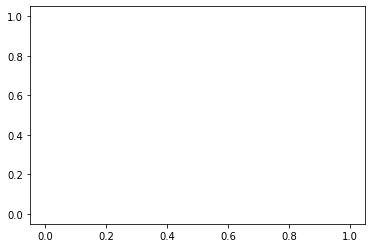

In [49]:
import numpy, scipy, matplotlib
import scipy.constants as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

def model(Voltage, V,w): 
    const = 2/3 * ((2*9.1e-31)**(3/2))/(2*sc.pi*sc.hbar)
    h = sc.h
    e = sc.e
    return  const*V*(-e*Voltage-w)**(3/2)

# def model(v, A,B,C): 
#     return A*(B**(3/2)-(abs(v)-C)**(3/2))
y = 0
x = np.linspace(-1,0,20)
y = model(x,1,2.1e-19)
plt.plot(x,y)

# function for genetic algorithm to minimize (sum of squared error)
# def sumOfSquaredError(parameterTuple):
#     warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
#     val = model(df.v_b, *parameterTuple)
#     return numpy.sum((df.i_b - val) ** 2.0)


fittedParameters, pcov = curve_fit(model, df.v_b, df.i_b,p0=[1,2.1e-19],maxfev=10000)

# print("fitted_params" + str(fittedParameters))
model(-1,1000000000,2.1e-19)

In [9]:
import numpy as np
sc.e
from numpy import exp, linspace, random
import math

1.6021766208e-19

[1. 1. 1.]


/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in float_power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


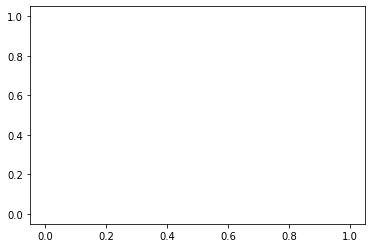

In [181]:
# k_max = sc.e*-df.v_b
# w = sc.h*6.66e14 -k_max
# phi = df.v_b-(w/sc.e)
# EF = -sc.e*phi-w

def model(v, A, B,C):
#     const = 2/3 * ((2*9.1e-31)**(3/2))/(2*sc.pi**2*sc.hbar**3)
#     k_max = -sc.e*v[0]
#     w = sc.h * sc.c/480e-9 - k_max
    return A*(np.float_power(B,1.5)-np.float_power(-v-C,1.5))



fittedParameters, pcov = curve_fit(model, df.v_b, df.i_b,maxfev=10000)
print(fittedParameters)
plt.plot(df.v_b, model(df.v_b,*fittedParameters), c='b')

[2.44917729e-35]


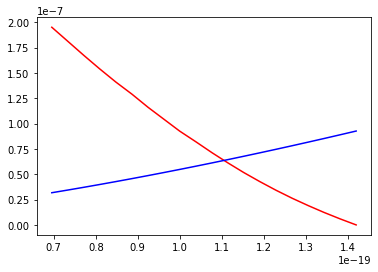

In [154]:
k_max = sc.e*-df.v_b
w = sc.h*6.66e14 -k_max
phi = df.v_b-(w/sc.e)
EF = -sc.e*phi-w
plt.plot(EF, df.i_b, c='r')
fittedParameters, pcov = curve_fit(model, EF, df.i_b,maxfev=10000)
print(fittedParameters)
plt.plot(EF, model(EF,*fittedParameters), c='b')

0     1.419528e-19
1     1.381076e-19
2     1.342624e-19
3     1.305774e-19
4     1.267322e-19
5     1.228869e-19
6     1.190417e-19
7     1.151965e-19
8     1.115115e-19
9     1.076663e-19
10    1.038210e-19
11    9.997582e-20
12    9.629081e-20
13    9.244559e-20
14    8.860037e-20
15    8.475514e-20
16    8.090992e-20
17    7.722491e-20
18    7.337969e-20
19    6.953447e-20
Name: v_b, dtype: float64
fitted_params[1.]


/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 432x288 with 0 Axes>

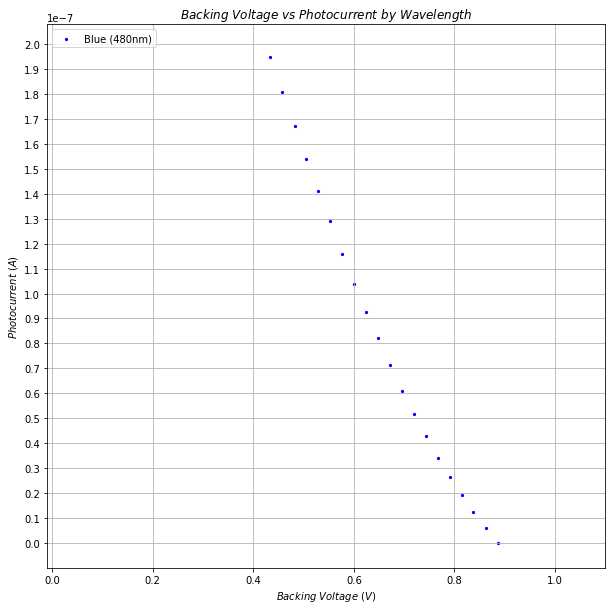

In [145]:
print("fitted_params" + str(fittedParameters))
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(-df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=20)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
# plt.show()
plt.plot(EF,model(EF,*fittedParameters))
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(-0.01,1.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

In [ ]:
def kinetic_energy_model()